In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

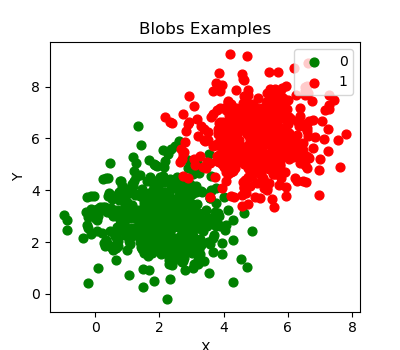

In [2]:
# We need to plot x, y --- features, z --- labels (n classes)

# Good dataset
from sklearn.datasets import make_blobs

centers = [[2,3],[5,6]]
data, labels = make_blobs(n_samples = 1000, centers= np.array(centers) , random_state = 100)
fig, ax = plt.subplots(figsize = (4,3.5))

colours = ('green', "red")
for label in range(len(centers)):
    ax.scatter(x=data[labels==label, 0], 
               y=data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label)

ax.set(xlabel='X',
       ylabel='Y',
       title='Blobs Examples')


ax.legend(loc='upper right')

In [3]:
# Binary classifier

class BinNet(nn.Module):
    def __init__(self, _in, _out):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(_in, 3),
            nn.Sigmoid(),
            nn.Linear(3, 3),
            nn.Sigmoid(),
            nn.Linear(3, _out),
            nn.Sigmoid(),
        
        )
    
    def forward(self, x):
        return self.model(x)
    
    
model = BinNet(2, 1)

In [4]:
EPOCH = 20 

x_train_data = torch.Tensor(data)
y_train_data = torch.Tensor(labels).unsqueeze(1)

print(x_train_data.shape, y_train_data.shape)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.1)

print("Training")
# Training loop
for epoch in range(EPOCH):
    
    # Forward
    ypred = model.forward(x_train_data)
    
    # Zero-grad
    optimizer.zero_grad()
    
    # Backward
    loss = criterion(ypred, y_train_data)
    loss.backward()
    
    # Update
    optimizer.step()
    
    print(f"epoch {epoch}, loss: {loss.item()}")

torch.Size([1000, 2]) torch.Size([1000, 1])
Training
epoch 0, loss: 0.7074865698814392
epoch 1, loss: 0.6937996745109558
epoch 2, loss: 0.6940820813179016
epoch 3, loss: 0.6961308121681213
epoch 4, loss: 0.6949319839477539
epoch 5, loss: 0.691436767578125
epoch 6, loss: 0.6877416968345642
epoch 7, loss: 0.684565007686615
epoch 8, loss: 0.6817359328269958
epoch 9, loss: 0.6785566210746765
epoch 10, loss: 0.673747181892395
epoch 11, loss: 0.6668262481689453
epoch 12, loss: 0.6567847728729248
epoch 13, loss: 0.6435785889625549
epoch 14, loss: 0.6284875273704529
epoch 15, loss: 0.6122020483016968
epoch 16, loss: 0.5938006639480591
epoch 17, loss: 0.5741145014762878
epoch 18, loss: 0.5529425144195557
epoch 19, loss: 0.5304437279701233


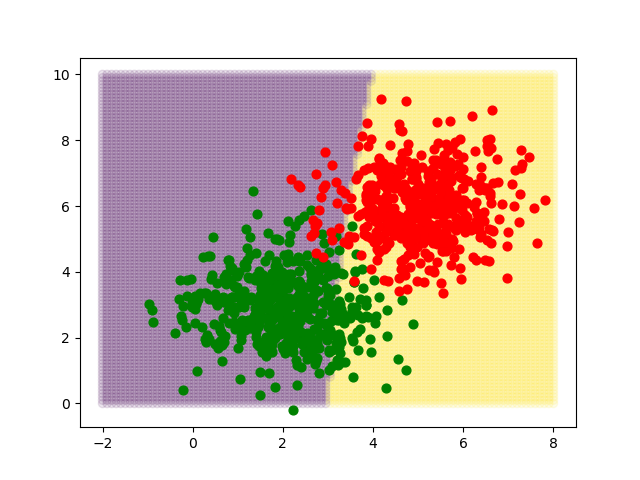

In [5]:
y = model.forward(x_train_data).detach().numpy()


fig, ax = plt.subplots()
X, Y = np.mgrid[-2:8:100j,0:10:100j]
X = X.flatten()
Y = Y.flatten()

# Visualize decision boundary 
colors = {0: 'red', 1: 'blue'}
pred = [1 if model.forward(torch.Tensor([x,y])).detach().numpy() > 0.5 else 0 for x, y in zip(X, Y)]

ax.scatter(X, Y, alpha = 0.1, c = pred)
for label in range(len(centers)):
    ax.scatter(x=data[labels==label, 0], 
               y=data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label)
plt.show()


#######
[('model.0.weight', Parameter containing:
tensor([[ -0.6821, 100.0000],
        [  2.7590,  49.8431],
        [  0.5628,   0.8825]], requires_grad=True)), ('model.0.bias', Parameter containing:
tensor([ 1.7408, -1.5235, -3.2080], requires_grad=True)), ('model.2.weight', Parameter containing:
tensor([[ 0.0742, -0.6302, -0.3174],
        [ 1.7175, -1.9687,  0.6062],
        [-2.1577,  1.9216,  0.1685]], requires_grad=True)), ('model.2.bias', Parameter containing:
tensor([11.6445, -9.1651, -0.5912], requires_grad=True)), ('model.4.weight', Parameter containing:
tensor([[  -8.4948, -645.1281,   66.8475]], requires_grad=True)), ('model.4.bias', Parameter containing:
tensor([-48.2115], requires_grad=True))]
#######
{'w0': ('model.0.weight', 0, 0, tensor(-0.6821)), 'w1': ('model.0.weight', 0, 1, tensor(100.)), 'w2': ('model.0.weight', 1, 0, tensor(2.7590)), 'w3': ('model.0.weight', 1, 1, tensor(49.8431)), 'w4': ('model.0.weight', 2, 0, tensor(0.5628)), 'w5': ('model.0.weight', 2, 1, t

interactive(children=(FloatSlider(value=0.0, description='w0', max=3.0, min=-3.0, step=0.01), FloatSlider(valu…

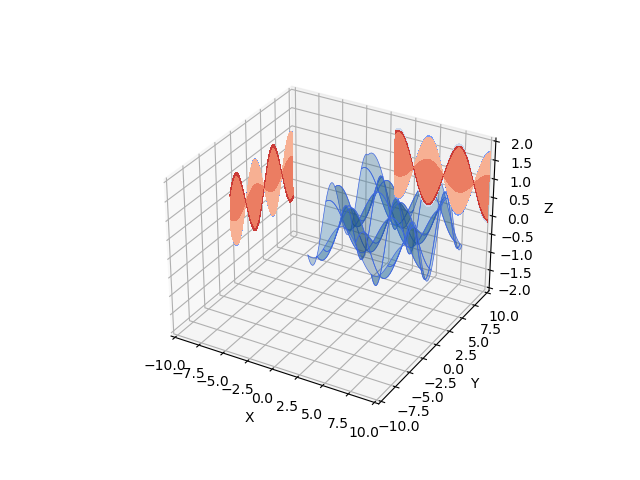

In [17]:
# set up plot
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')

x = np.linspace(0, 2 * np.pi, 100)

def my_sine(x, w, amp, phi):
    return amp*np.sin(w * (x-phi))

X, Y = np.meshgrid(np.arange(-2, 8, 0.2), np.arange(-1, 10, 0.2))
Z = np.sin(X)* np.cos(Y)


# Takes a parameters in the model and turn it into a interactive component

# next(model.parameters()).data[0] = torch.Tensor([70])

print('#######')
print(list(model.named_parameters()))

print('#######')

kwargs = {}    
kwargs_vals = {}    
kwargs_range = {}    
g_counter = 0
def recursive_modify(t: torch.Tensor, param_key: str, index: int = 0) -> None:
    global g_counter
    if t.dim() == 1:
        for i in range(len(t)):
            kwargs.setdefault(f"w{g_counter}", (param_key, index, i, t.data[i]))
            kwargs_vals.setdefault(f"w{g_counter}", float(t.data[i].item()))
            kwargs_range.setdefault(f"w{g_counter}", (-3, 3, 0.01))
            g_counter += 1
    else:
        for i, subt in enumerate(t):
            recursive_modify(subt, param_key, index + i)
            

for name, p in model.named_parameters():
    recursive_modify(p, name)

print(kwargs)
print(kwargs_range)

param_key, index, subindex, _ = kwargs['w1']
new_val = torch.Tensor([100])
model.state_dict()[param_key].data[index][subindex] = new_val.item()

print(list(model.named_parameters()))

print("####")

glob_kwargs_vals = kwargs_vals
@widgets.interact(**kwargs_range)
def update(**kwargs_vals):

    global glob_kwargs_vals 
    for key, value in glob_kwargs_vals.items():
        if key in kwargs_vals and kwargs_vals[key] != value:
            print(f"slider moved: ", key)
            param_key, index, subindex, val = kwargs[key]
            new_val = torch.Tensor([kwargs_vals[key]])
            
            prev_loc = torch.Tensor([glob_kwargs_vals[key]]).item()
            if 'bias' in param_key:
                updated_val = model.state_dict()[param_key].data[subindex] + (new_val.item() - prev_loc)
                model.state_dict()[param_key].data[subindex] = updated_val
            else:
                updated_val = model.state_dict()[param_key].data[index][subindex] + (new_val.item() - prev_loc)
                model.state_dict()[param_key].data[index][subindex] = updated_val
    glob_kwargs_vals = kwargs_vals
    
#     for k, v in kwargs_vals.items():
#         param_key, index, subindex, val = kwargs[k]
#         new_val = torch.Tensor([v])

#         if 'bias' in param_key:
#             updated_val = model.state_dict()[param_key].data[subindex] + new_val.item()
#             model.state_dict()[param_key].data[subindex] = updated_val
#         else:
#             updated_val = model.state_dict()[param_key].data[index][subindex] + new_val.item()
#             model.state_dict()[param_key].data[index][subindex] = updated_val
    
        
    # It makes sense now. Because the term +new_val.item() is oblivious to which widget is moved. This means previous moved widgets that was 
    # moved to a value not zero will still increment.

    print(kwargs_vals)
    print(list(model.named_parameters()))
    
   
    
    ax.clear() # clear canvas/ Remove old lines from plot and plot new one

    # Plot the 3D surface
    ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                    alpha=0.3)

    # Plot projections of the contours for each dimension.  We choose offsets
    # that match the appropriate axes limits. Projected contours sit on
    # the walls of the 3D graph
    ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
    ax.contourf(X, Y, Z, zdir='x', offset=-10, cmap='coolwarm')
    ax.contourf(X, Y, Z, zdir='y', offset=15, cmap='coolwarm')

    ax.set(xlim=(-10, 10), ylim=(-10, 10), zlim=(-2, 2),
           xlabel='X', ylabel='Y', zlabel='Z')

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

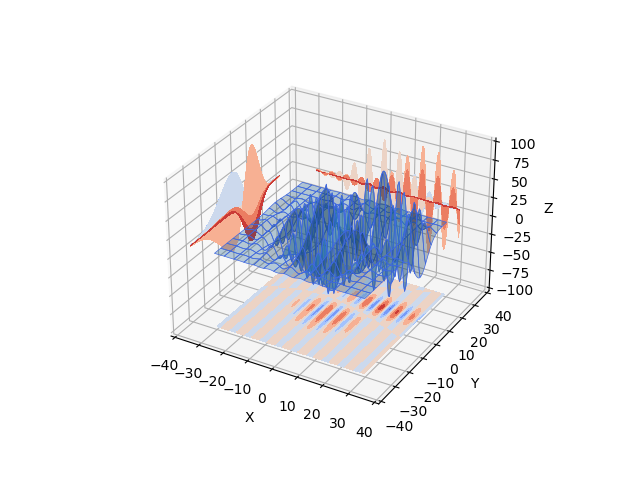

In [7]:
# set up plot
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')

x = np.linspace(0, 2 * np.pi, 100)

def my_sine(x, w, amp, phi):
    return amp*np.sin(w * (x-phi))


@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    
    ax.clear() # clear canvas/ Remove old lines from plot and plot new one
    
    X, Y, Z = axes3d.get_test_data(0.05)

    # Plot the 3D surface
    ax.plot_surface(X, Y, Z * my_sine(X, w, amp, phi), edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                    alpha=0.3)

    # Plot projections of the contours for each dimension.  We choose offsets
    # that match the appropriate axes limits. Projected contours sit on
    # the walls of the 3D graph
    ax.contourf(X, Y, Z* my_sine(X, w, amp, phi), zdir='z', offset=-100, cmap='coolwarm')
    ax.contourf(X, Y, Z* my_sine(X, w, amp, phi), zdir='x', offset=-40, cmap='coolwarm')
    ax.contourf(X, Y, Z* my_sine(X, w, amp, phi), zdir='y', offset=40, cmap='coolwarm')

    ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
           xlabel='X', ylabel='Y', zlabel='Z')